# 1.	Build a K-means model.
1.	Import iris dataset (using from sklearn.datasets import load_iris)
2.	Build a KMeans model with 3 clusters
3.	Make a scatter plot with two features and colour it according to the labels.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets 

In [3]:
iris=datasets.load_iris()

In [10]:
x=iris.data
y=iris.target

In [11]:
x = pd.DataFrame(x,columns=['sepal_width','sepal_length','petal_width','petal_length'])
y = pd.DataFrame(y,columns=['category'])

In [12]:
x.shape

(150, 4)

In [13]:
y.shape

(150, 1)

In [14]:
x.head()

,sepal_width,sepal_length,petal_width,petal_length
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


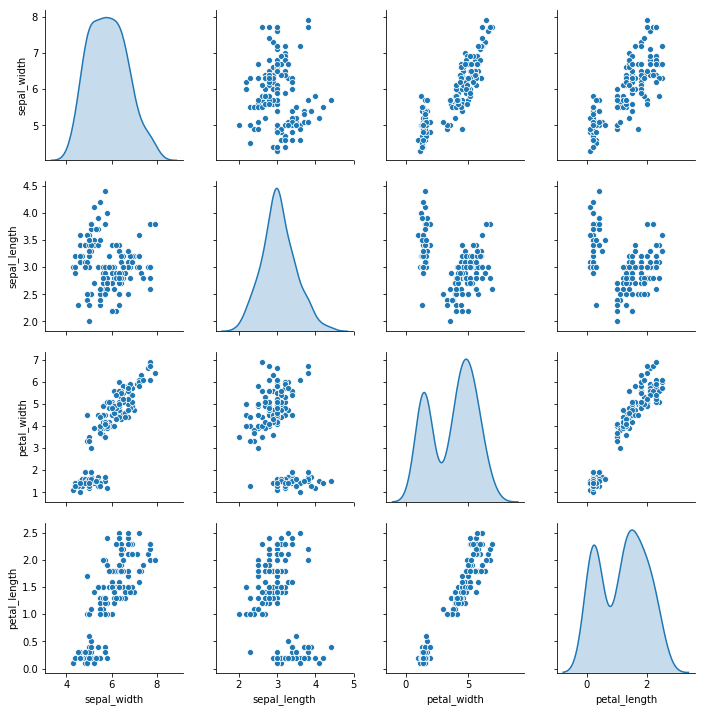

In [16]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(x,diag_kind='kde')

In [17]:
from sklearn.cluster import KMeans

In [29]:
cluster_range = range( 1, 6)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(x)
  labels = clusters.labels_  # capturing labels
  centroids = clusters.cluster_centers_  # capturing centroids
  cluster_errors.append( clusters.inertia_ )   #capturing interia
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,930.730600
1,2,360.987000
2,3,183.624067
3,4,95.357939
4,5,46.446182


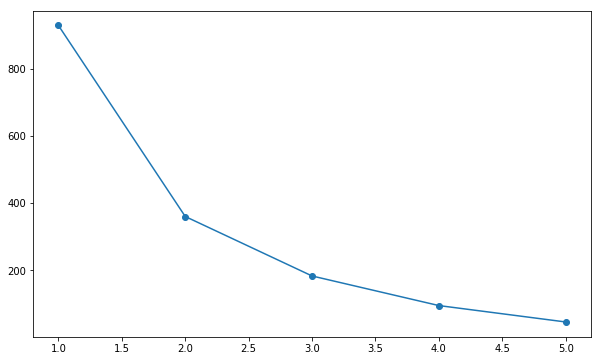

In [30]:
# Elbow plot to better choose the value of K
plt.figure(figsize=(10,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [31]:
# Number of clusters

kmeans = KMeans(n_clusters=5)

# Fitting the input data

kmeans = kmeans.fit(x)

# Getting the cluster labels

labels = kmeans.predict(x)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")


print(centroids) # From sci-kit learn
print(labels)

Centroid values
sklearn
[[5.006      3.428      1.462      0.246      1.        ]
 [7.475      3.125      6.3        2.05       3.        ]
 [5.508      2.6        3.908      1.204      4.        ]
 [6.52916667 3.05833333 5.50833333 2.1625     0.        ]
 [6.20769231 2.85384615 4.74615385 1.56410256 2.        ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 3 4 1 3 3 1 2 1 3 1 3
 3 3 4 3 3 3 1 1 4 3 4 1 4 3 1 4 4 3 1 1 1 3 4 4 1 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]


In [32]:
x['cluster_id']=labels

In [33]:
x.head()

,sepal_width,sepal_length,petal_width,petal_length,cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
#x.columns=['x1','x2','x3','x4','cluster_id']
#x.head()

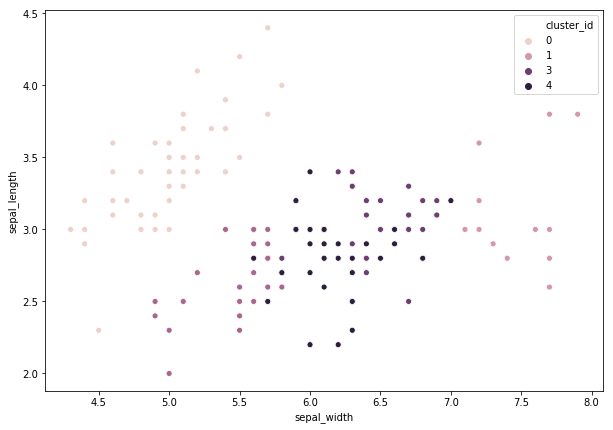

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal_width',y='sepal_length',data=x,hue=x['cluster_id'])
plt.show()

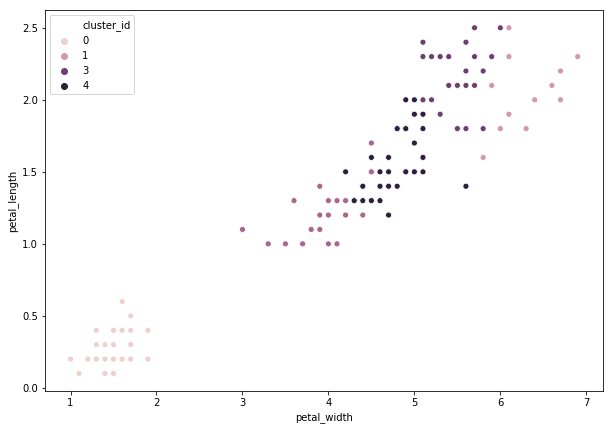

In [36]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width',y='petal_length',data=x,hue=x['cluster_id'])
plt.show()

# 2.	On the  given Big Mart Sales dataset perform the below tasks and write your observations
a.	Identify the Principal Components for the given dataset.

b.	Cleanse the data.(3 marks)

c.	Find the optimal number of Principal Components  with explained variance and cumulative variance.(4 marks)


In [59]:
import csv

In [60]:
sales=pd.read_csv("C:\\Users\\dsouz\\Downloads\\BigmartSales.csv")

In [61]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [62]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [63]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [64]:
sales.shape

(8523, 12)

In [65]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [66]:
sales['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [67]:
sales['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
7          NaN
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
18         NaN
19      13.350
20      18.850
21         NaN
22      14.600
23         NaN
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
29         NaN
         ...  
8493     7.420
8494    15.200
8495     9.695
8496     7.420
8497    13.650
8498    15.350
8499    11.600
8500    20.350
8501     5.340
8502     8.420
8503    20.500
8504       NaN
8505    10.500
8506    17.250
8507     5.880
8508    11.350
8509     8.100
8510    13.800
8511    17.500
8512    20.700
8513    12.000
8514    15.000
8515    20.700
8516    18.600
8517    20.750
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [68]:
sales['Item_Weight']=sales['Item_Weight'].fillna(sales['Item_Weight'].median())

In [69]:
sales['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
15.100      68
9.300       68
10.500      66
16.700      66
19.350      63
16.000      62
20.700      62
9.800       61
17.750      60
17.700      60
18.850      59
15.850      59
15.000      59
18.250      58
19.600      58
16.750      58
15.700      57
12.500      56
9.195       56
10.195      53
20.200      53
12.100      53
15.600      52
11.500      51
13.500      51
          ... 
5.305        3
6.305        3
7.710        3
7.105        3
5.825        3
6.460        3
5.425        3
6.895        2
8.920        2
6.325        2
6.400        2
4.905        2
5.675        2
5.155        2
7.275        2
5.210        2
8.485        2
8.800        2
5.885        2
7.605        2
6.405        2
5.735        2
8.670        2
6.775        2
7.890        2
7.560        2
9.420        1
5.400        1
6.520        1
7.685        1
Name: Item_Weight, Length: 415, dtype: int64

In [70]:
sales['Outlet_Size'] = sales['Outlet_Size'].fillna('NA')

In [71]:
sales['Outlet_Size'].unique()

array(['Medium', 'NA', 'High', 'Small'], dtype=object)

In [72]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [73]:
sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [74]:
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [76]:
sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [78]:
sales=sales.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [80]:
dependent = 'Item_Outlet_Sales'
y=sales[dependent]
x=sales.drop('Item_Outlet_Sales',axis=1)

In [81]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NA,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1


In [82]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [84]:
x=pd.get_dummies(x)

In [85]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=22)

In [89]:
sc=StandardScaler()
sc.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
xtrain=pd.DataFrame(sc.transform(xtrain),columns=xtrain.columns,index=xtrain.index)
xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns,index=xtest.index)

In [91]:
xtrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2165,1.755530,-0.575878,1.245126,0.742172,-0.742172,-0.287336,-0.173325,-0.117319,-0.292095,3.380705,...,1.438378,-0.634905,-0.625559,-0.632307,-0.696289,1.256272,-0.388964,-1.372921,2.872214,-0.346345
4105,-0.045314,-0.762575,1.937303,0.742172,-0.742172,-0.287336,-0.173325,-0.117319,-0.292095,-0.295796,...,1.438378,-0.634905,-0.625559,-0.632307,-0.696289,1.256272,-0.388964,-1.372921,-0.348163,2.887293
2167,0.837453,-1.018593,-0.565317,0.742172,-0.742172,-0.287336,-0.173325,-0.117319,-0.292095,-0.295796,...,-0.695228,1.575039,-0.625559,-0.632307,1.436185,-0.796006,-0.388964,0.728374,-0.348163,-0.346345
3959,-0.751527,-0.806385,0.733735,0.742172,-0.742172,-0.287336,-0.173325,-0.117319,-0.292095,-0.295796,...,-0.695228,-0.634905,-0.625559,-0.632307,-0.696289,1.256272,-0.388964,0.728374,-0.348163,-0.346345
4217,-0.917487,-1.275499,1.480673,0.742172,-0.742172,-0.287336,-0.173325,-0.117319,-0.292095,-0.295796,...,-0.695228,1.575039,-0.625559,-0.632307,1.436185,-0.796006,-0.388964,0.728374,-0.348163,-0.346345


In [92]:
#pca
from sklearn.decomposition import PCA

In [93]:
centered=xtrain-xtrain.mean(axis=0)

In [94]:
pca=PCA()
pca.fit(centered)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [95]:
df_pca=pca.transform(centered)

In [96]:
df_pca.shape

(5966, 32)

In [97]:
df_pca=pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,3.041152,-1.019017,-0.149233,-0.232215,-0.474225,-2.213906,0.682497,2.978903,0.401993,0.641004,...,-0.518982,0.249105,0.760792,0.082942,0.065496,3.053016e-16,3.801392e-16,5.223560e-16,-1.744638e-16,-4.997897e-16
1,3.084701,-0.868653,-0.223556,-0.471741,-0.833782,0.004573,-0.187852,-0.551401,-2.715926,-0.479148,...,-0.159530,0.195448,0.753733,0.046229,0.059985,7.219073e-16,4.583442e-16,-2.914604e-16,5.896989e-16,-4.226260e-17
2,-1.916137,-2.067758,-1.413855,0.142697,-0.744016,0.101839,-0.401100,0.144811,-0.313795,1.656361,...,-0.481872,-0.851906,-1.064744,0.031788,0.162667,-1.026966e-15,-4.455892e-16,8.588923e-16,1.171682e-15,-2.222340e-16
3,0.553021,-2.045905,-0.740766,-1.375793,3.160718,0.794811,-0.051010,-0.071548,0.552176,1.544952,...,-0.371585,-0.676903,-1.030399,-0.125820,0.085258,8.325701e-17,1.372779e-16,-3.658224e-16,-4.242640e-16,3.883887e-16
4,-1.959913,-2.029618,-1.554747,0.115965,-0.940932,0.823532,0.224229,-0.242205,1.822609,-1.485515,...,-1.431390,-1.396283,-0.783200,0.087350,0.224179,1.387682e-16,-1.680334e-16,3.592920e-16,-3.271195e-16,1.470856e-15


In [98]:
pca.explained_variance_

array([3.51194582e+00, 2.32468315e+00, 2.26161721e+00, 1.76232352e+00,
       1.50228536e+00, 1.20787022e+00, 1.16844685e+00, 1.13834571e+00,
       1.11669233e+00, 1.11063416e+00, 1.09984453e+00, 1.08624033e+00,
       1.07891433e+00, 1.06431945e+00, 1.04815509e+00, 1.03334207e+00,
       1.02624161e+00, 1.01988198e+00, 1.01516717e+00, 1.00928335e+00,
       9.30165482e-01, 8.94935244e-01, 8.16960723e-01, 7.93163427e-01,
       7.63157354e-01, 1.54450980e-01, 6.62971687e-02, 6.92609190e-31,
       7.42073623e-32, 3.86711937e-32, 3.27641737e-32, 2.23676189e-32])

In [104]:
sum=pca.explained_variance_ratio_
sum.sum()

0.9999999999999999

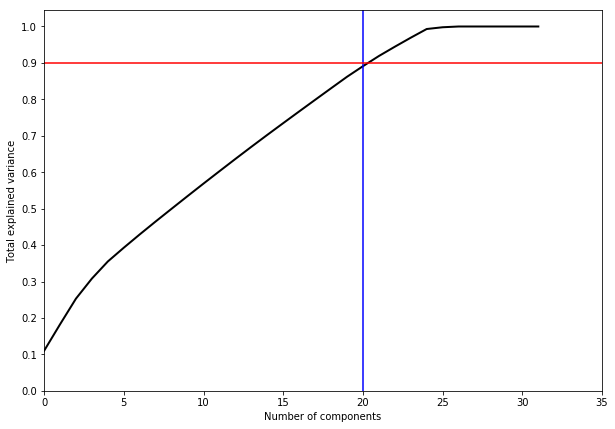

In [102]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 35)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(20, c='b')
plt.axhline(0.9, c='r')

plt.show()